<a href="https://colab.research.google.com/github/vsoumyareddy/Next24tech/blob/main/Summer_Heat_Waves_Mobile_Alert_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix,roc_curve)
from sklearn.metrics import roc_curve, auc

In [ ]:
# Load dataset
df = pd.read_csv('/content/weather.csv')
df.head()


,Date,UT time,Temperature (K),Relative Humidity (%),Pressure (hPa),Wind speed (m/s),Wind direction,Rainfall (kg/m2),Short-wave irradiation (Wh/m2)
0,01-07-2016,00:00,299.50,88.12,991.03,6.04,253.53,0.123595,0.0000
1,01-07-2016,00:15,299.47,87.99,991.03,6.04,253.53,0.123595,0.0000
2,01-07-2016,00:30,299.46,87.89,991.11,6.11,253.78,0.129541,0.0000
3,01-07-2016,00:45,299.49,87.74,991.23,6.19,253.91,0.133325,0.1806
4,01-07-2016,01:00,299.54,87.56,991.38,6.28,253.93,0.134949,4.2518


In [ ]:
# data staistics
df.describe()

,Temperature (K),Relative Humidity (%),Pressure (hPa),Wind speed (m/s),Wind direction,Rainfall (kg/m2),Short-wave irradiation (Wh/m2)
count,108096.000000,108096.000000,108096.000000,108096.000000,108096.000000,108096.000000,108096.000000
mean,300.287942,70.933130,995.705624,3.861437,230.770353,0.062355,57.442991
std,2.576058,16.429193,2.712324,1.706280,96.658070,0.135174,77.011254
min,292.110000,18.550000,986.900000,0.010000,0.000000,0.000000,0.000000
25%,298.670000,59.430000,993.750000,2.650000,196.630000,0.000000,0.000000
50%,300.020000,75.590000,995.640000,3.670000,264.060000,0.001986,0.706550
75%,301.620000,84.882500,997.600000,4.930000,293.250000,0.080121,113.623575
max,309.720000,93.400000,1006.210000,11.390000,359.990000,3.054911,265.360700


In [ ]:
# Checking for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Date                              0
UT time                           0
Temperature (K)                   0
Relative Humidity (%)             0
Pressure (hPa)                    0
Wind speed (m/s)                  0
Wind direction                    0
Rainfall (kg/m2)                  0
Short-wave irradiation (Wh/m2)    0
dtype: int64


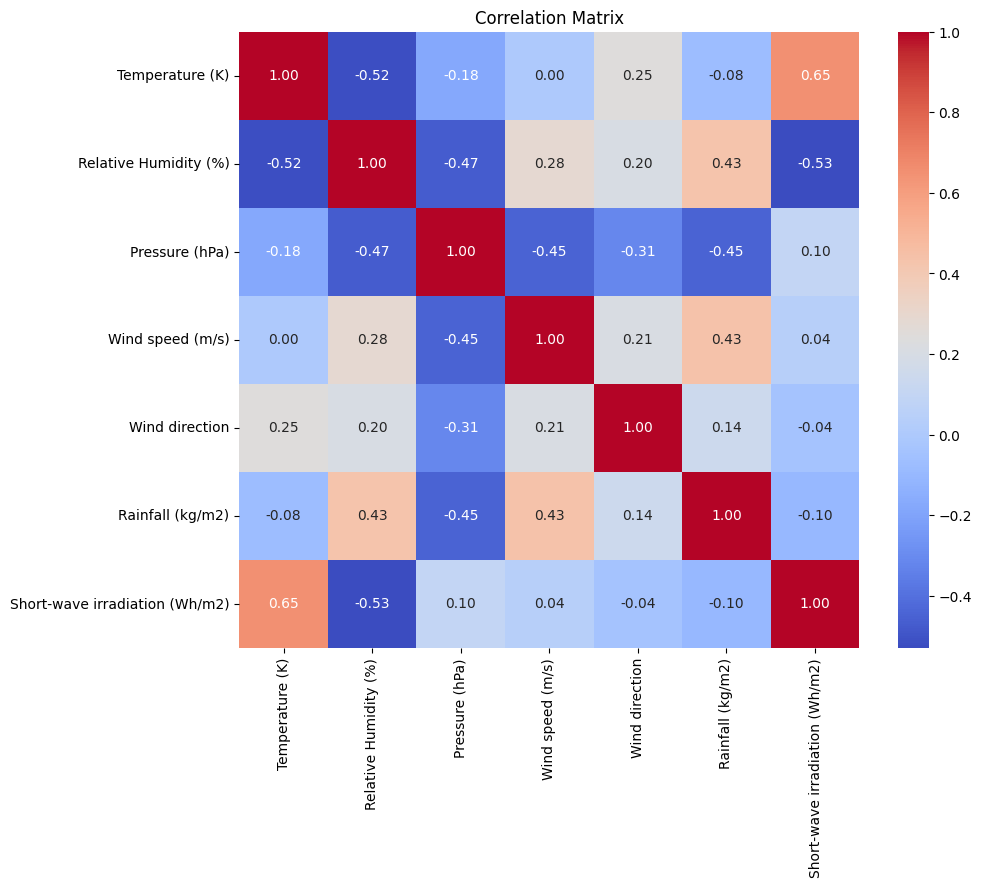

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

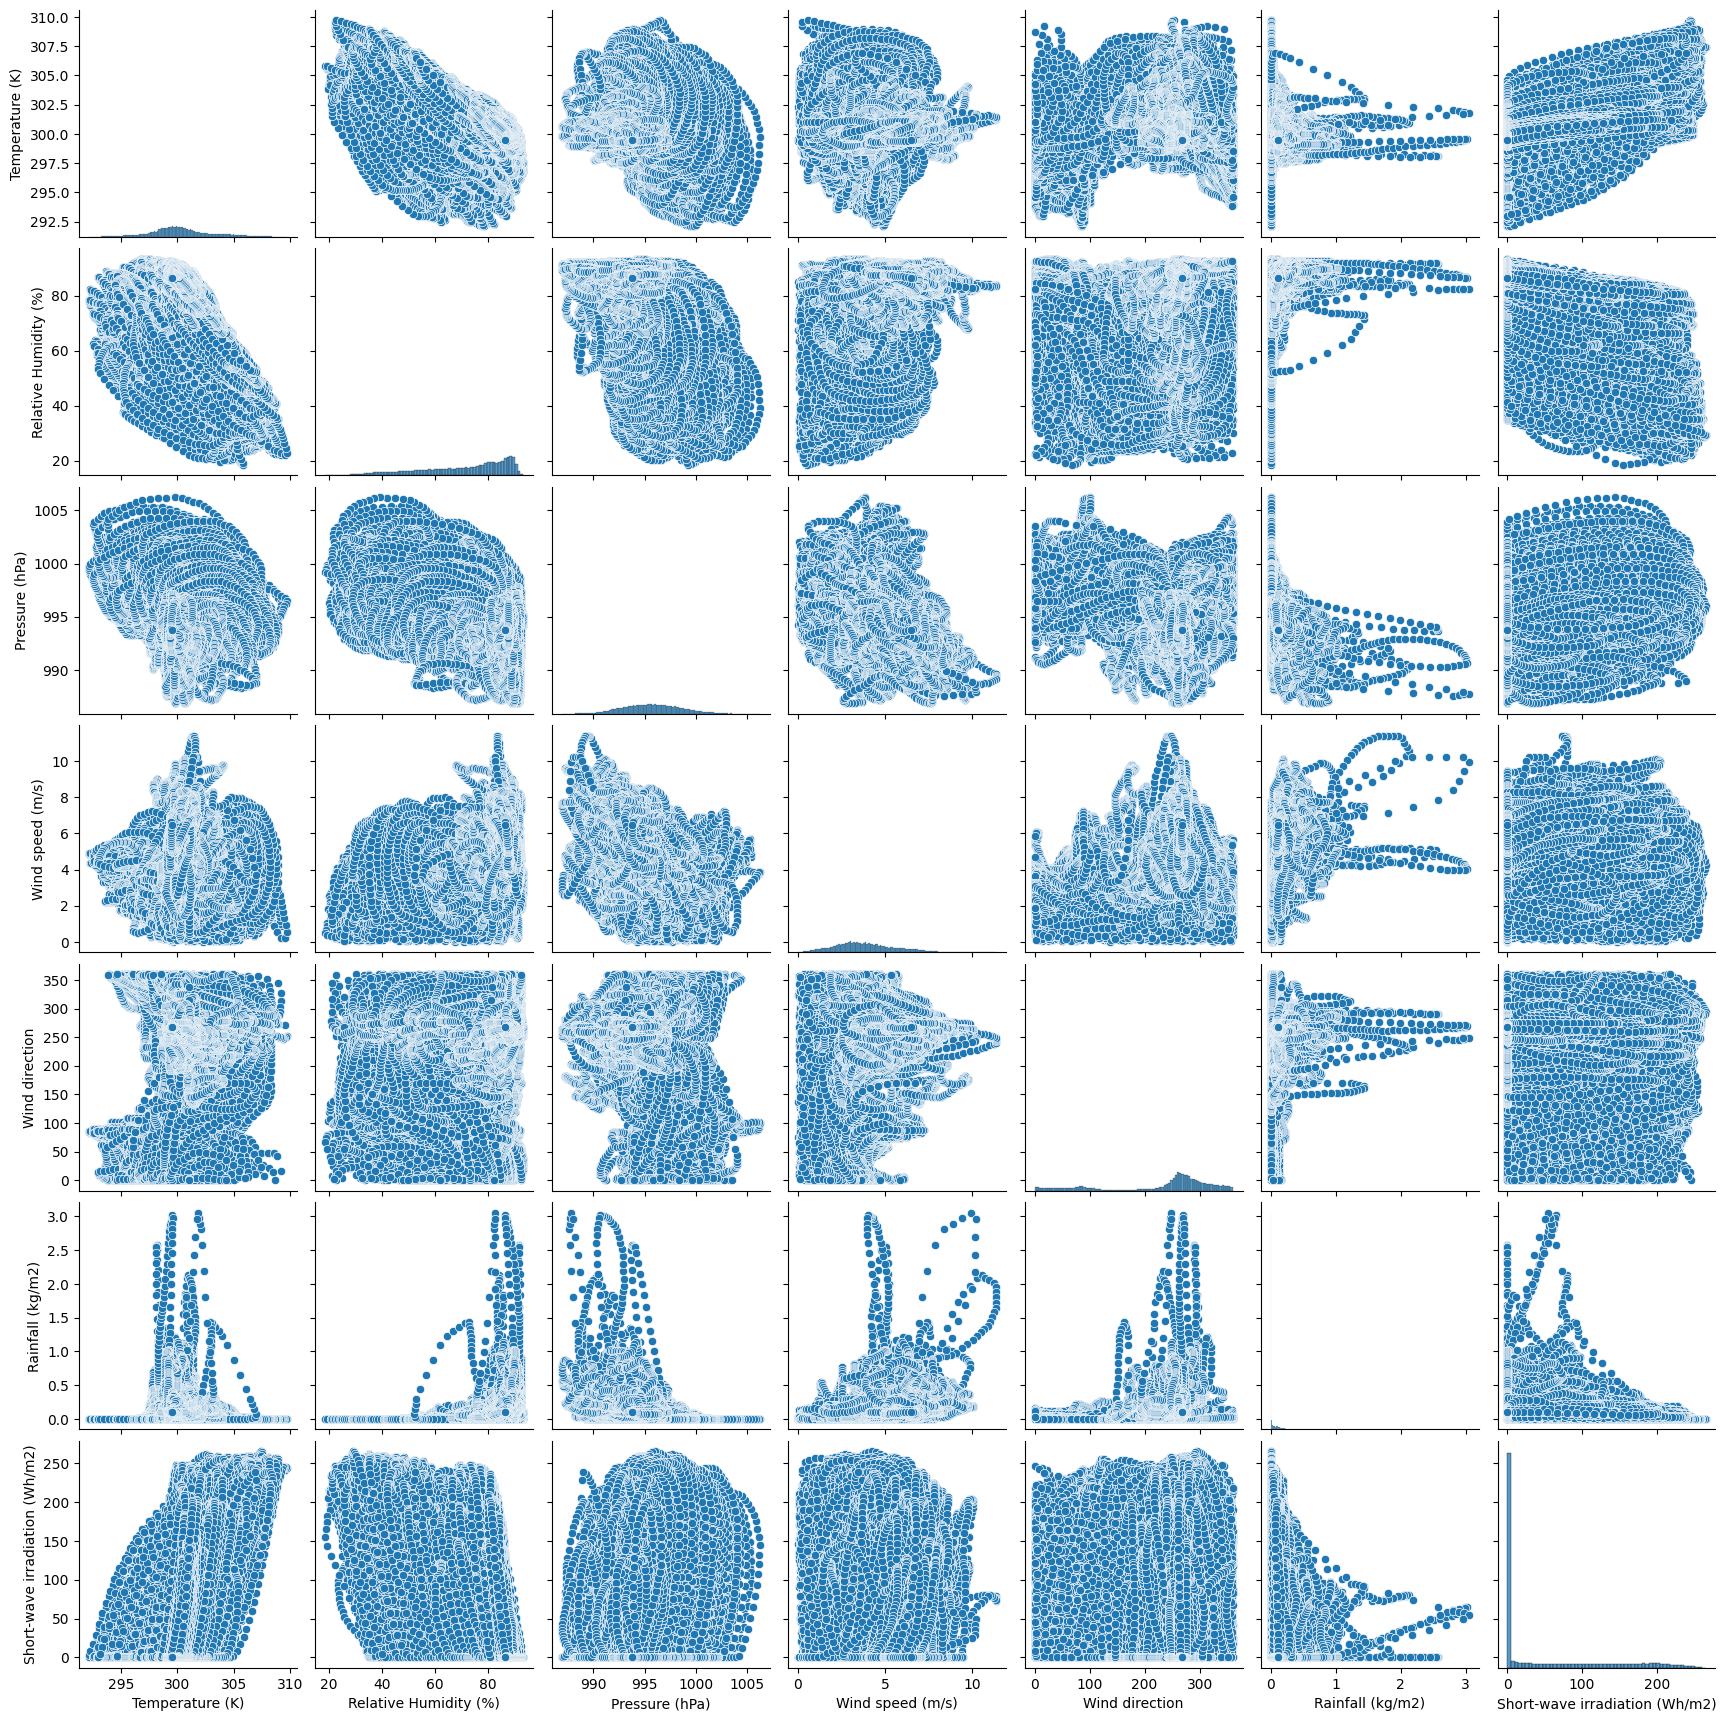

In [ ]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

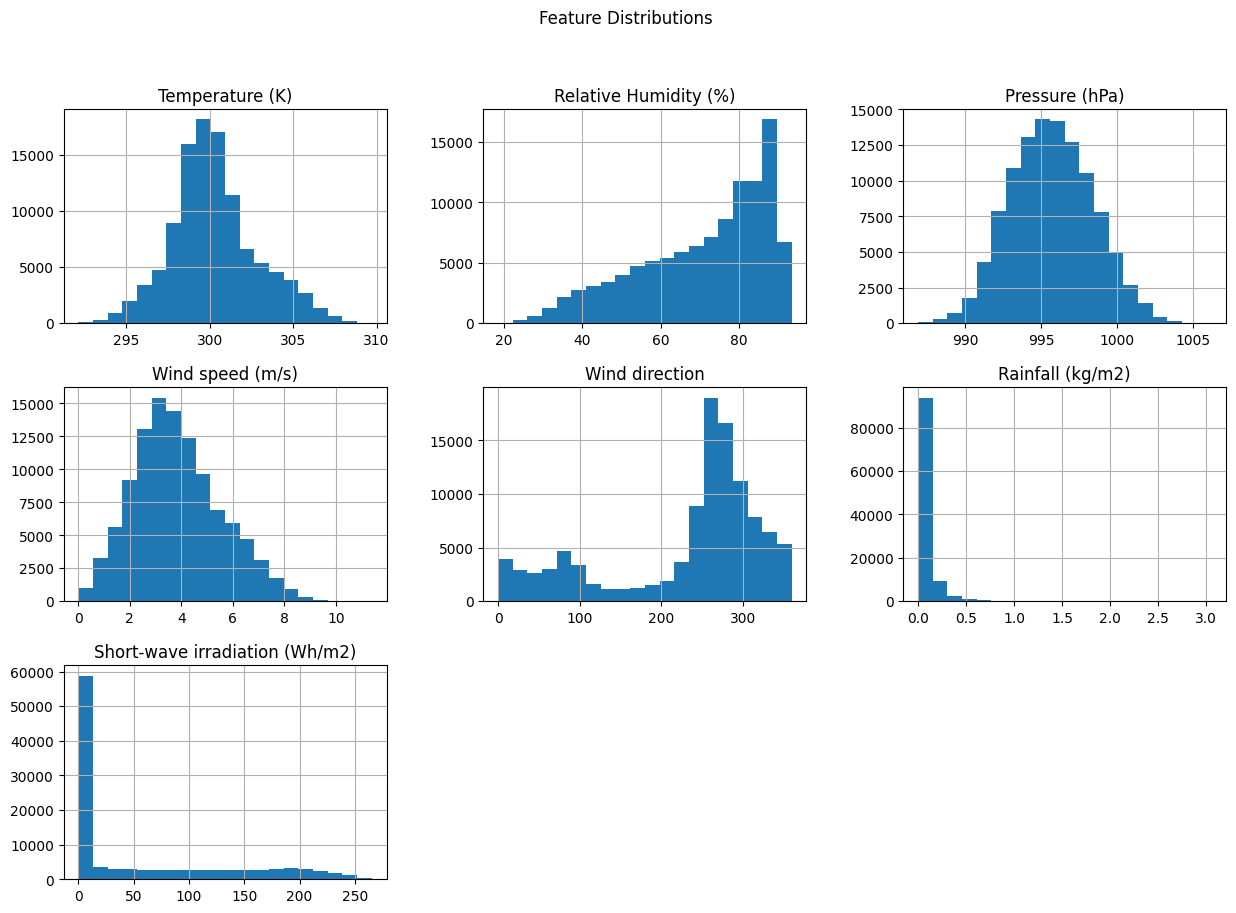

In [ ]:
# Distribution of each feature
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

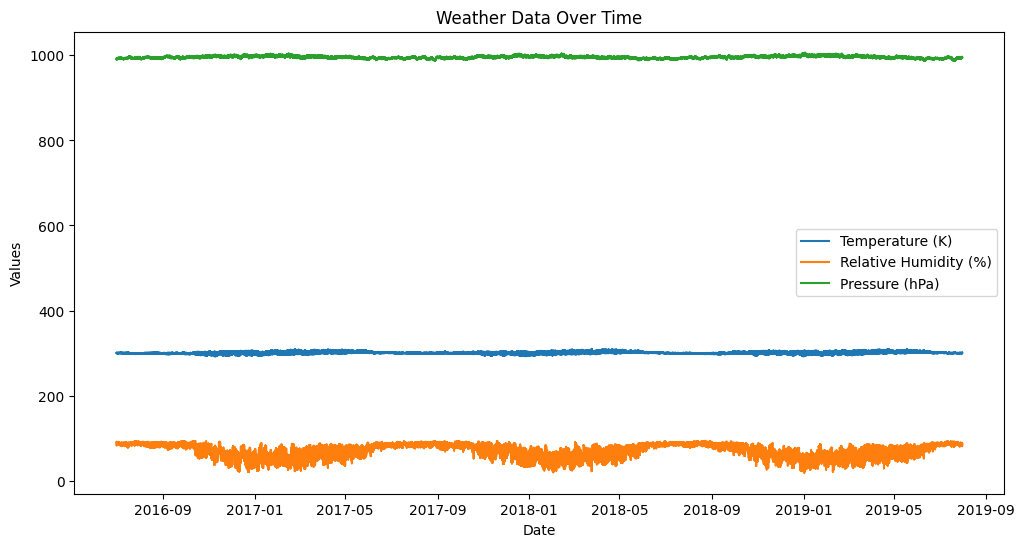

In [ ]:
# Plotting specific features over time (assuming a 'Date' column exists)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
    df.set_index('Date', inplace=True)

    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Temperature (K)'], label='Temperature (K)')
    plt.plot(df.index, df['Relative Humidity (%)'], label='Relative Humidity (%)')
    plt.plot(df.index, df['Pressure (hPa)'], label='Pressure (hPa)')
    plt.title('Weather Data Over Time')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

In [ ]:

# Convert temperature from Kelvin to Celsius for easier interpretation
df['Temperature (C)'] = df['Temperature (K)'] - 273.15

# Define thresholds for health conditions
temp_threshold = 32.0  # Celsius, high-risk temperature
irradiation_threshold = 800  # Wh/m2, high-risk irradiation

# Create a new column 'Health Condition' based on these thresholds
def classify_health_condition(row):
    if row['Temperature (C)'] >= temp_threshold or row['Short-wave irradiation (Wh/m2)'] >= irradiation_threshold:
        return 'Affected'
    else:
        return 'Normal'

df['Health Condition'] = df.apply(classify_health_condition, axis=1)

# Display the updated DataFrame with the new column
print("Updated DataFrame with Health Condition:")
df[['Temperature (C)', 'Short-wave irradiation (Wh/m2)', 'Health Condition']].head()


Updated DataFrame with Health Condition:


,Temperature (C),Short-wave irradiation (Wh/m2),Health Condition
Date,,,
2016-07-01,26.35,0.0000,Normal
2016-07-01,26.32,0.0000,Normal
2016-07-01,26.31,0.0000,Normal
2016-07-01,26.34,0.1806,Normal
2016-07-01,26.39,4.2518,Normal


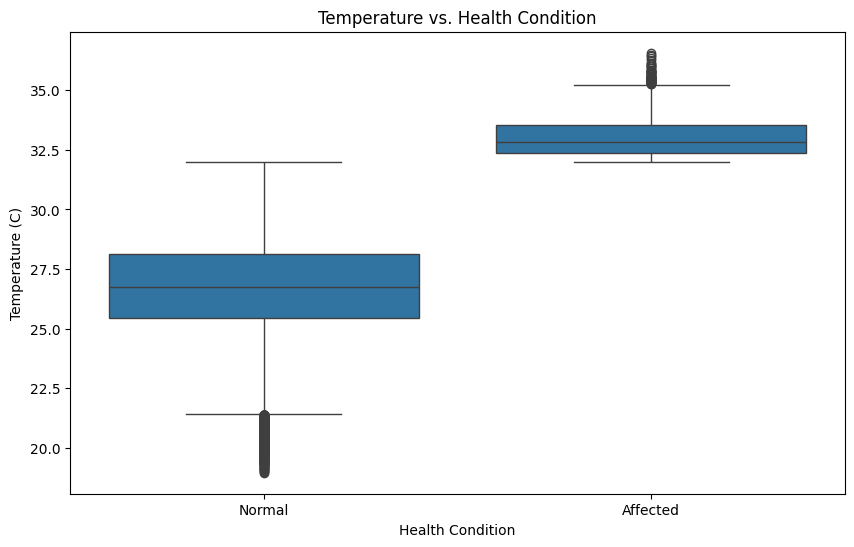

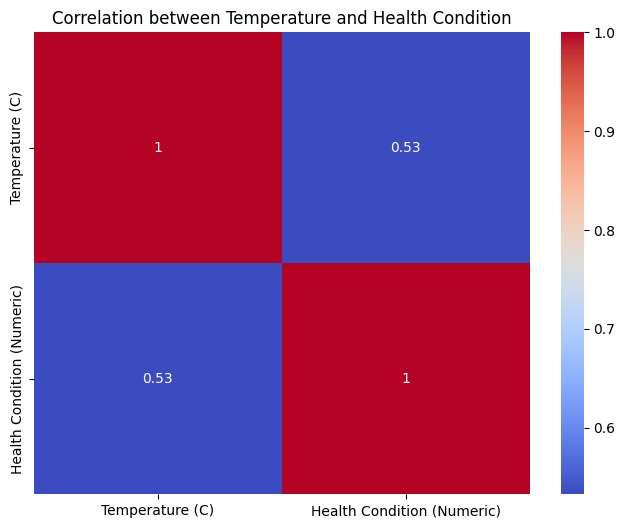

In [ ]:
# Correlation between temperature and the health condition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Health Condition', y='Temperature (C)', data=df)
plt.title('Temperature vs. Health Condition')
plt.show()
health_mapping = {'Normal': 0, 'Affected': 1}
df['Health Condition (Numeric)'] = df['Health Condition'].map(health_mapping)

# Visualize the correlation
correlation = df[['Temperature (C)', 'Health Condition (Numeric)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Temperature and Health Condition')
plt.show()


In [ ]:
del df['Health Condition']
del df['UT time']

In [ ]:
df.head()

,Temperature (K),Relative Humidity (%),Pressure (hPa),Wind speed (m/s),Wind direction,Rainfall (kg/m2),Short-wave irradiation (Wh/m2),Temperature (C),Health Condition (Numeric)
Date,,,,,,,,,
2016-07-01,299.50,88.12,991.03,6.04,253.53,0.123595,0.0000,26.35,0
2016-07-01,299.47,87.99,991.03,6.04,253.53,0.123595,0.0000,26.32,0
2016-07-01,299.46,87.89,991.11,6.11,253.78,0.129541,0.0000,26.31,0
2016-07-01,299.49,87.74,991.23,6.19,253.91,0.133325,0.1806,26.34,0
2016-07-01,299.54,87.56,991.38,6.28,253.93,0.134949,4.2518,26.39,0


Training Testing

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Health Condition (Numeric)'],axis=1)
y = df['Health Condition (Numeric)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize/Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_train.shape, X_test.shape

((75667, 8), (32429, 8))

Navie Bayes

Training Accuracy: 0.9581984220333831
Testing Accuracy: 0.9601591168398655
Confusion Matrix:
 [[29503  1290]
 [    2  1634]]


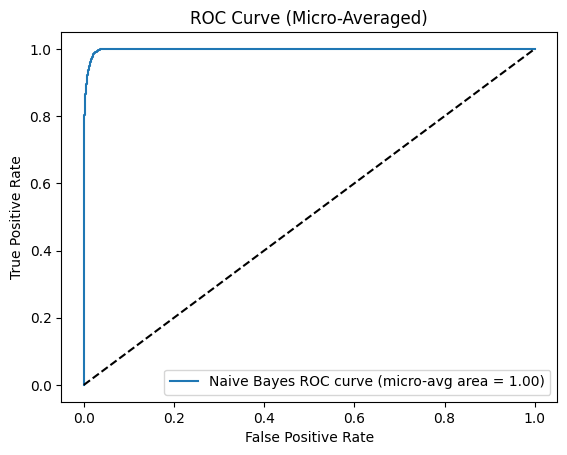

In [ ]:
from sklearn.naive_bayes import GaussianNB  # Or MultinomialNB if features are discrete counts


# Initialize Naive Bayes classifier
nb_model = GaussianNB()  # Use MultinomialNB for discrete features

# Fit the model
nb_model.fit(X_train, y_train)

# Predictions
y_pred_train = nb_model.predict(X_train)
y_pred_test = nb_model.predict(X_test)

# Evaluate performance
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

# Confusion Matrix
confusion_mtx = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", confusion_mtx)

# ROC Curve (for multiclass, consider micro- or macro-averaging)
y_prob = nb_model.predict_proba(X_test)[:, 1] # Extract probabilities for the positive class (unhealthy)
# Micro-averaged ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes ROC curve (micro-avg area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Micro-Averaged)')
plt.legend(loc="lower right")
plt.show()
table={}
# Store metrics (consider micro/macro averaging for multiclass)
table["NaiveBayes"] = (accuracy_score(y_test, y_pred_test),
                       precision_score(y_test, y_pred_test, average='micro'),  # Use 'micro' for multiclass
                       recall_score(y_test, y_pred_test, average='micro'),
                       f1_score(y_test, y_pred_test, average='micro'))

SVM

Training Accuracy: 0.9988105779269695
Testing Accuracy: 0.9985815165438342
Confusion Matrix:
 [[30772    21]
 [   25  1611]]


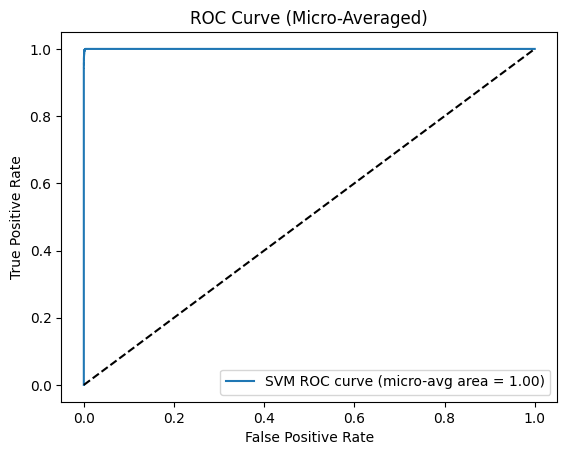

In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_model = SVC(probability=True)

# Fit the model
svm_model.fit(X_train, y_train)

# Predictions
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

# Evaluate performance
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

# Confusion Matrix
confusion_mtx = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", confusion_mtx)

# ROC Curve (for multiclass, consider micro- or macro-averaging)
y_prob = svm_model.predict_proba(X_test)[:, 1]  # Select probabilities for the positive class
# Micro-averaged ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)  # Assuming 1 is a positive class
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='SVM ROC curve (micro-avg area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Micro-Averaged)')
plt.legend(loc="lower right")
plt.show()

# Store metrics (consider micro/macro averaging for multiclass)
table["SVM"] = (accuracy_score(y_test, y_pred_test),
                  precision_score(y_test, y_pred_test, average='micro'),
                  recall_score(y_test, y_pred_test, average='micro'),
                  f1_score(y_test, y_pred_test, average='micro'))

Decision Tree

Confusion Matrix:
 [[30793     0]
 [    0  1636]]


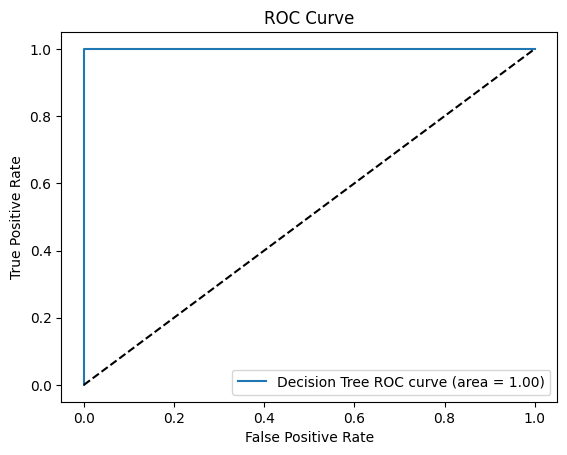

In [ ]:

from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
accuracy_score(y_train, dt.predict(X_train))

accuracy_score(y_test, dt.predict(X_test))

# Draw Confusion Matrix
confusion_mtx = confusion_matrix(y_test, dt.predict(X_test))
print("Confusion Matrix:\n", confusion_mtx)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Store metrics
table["DecisionTree"] = (accuracy_score(y_test, dt.predict(X_test)),
                         precision_score(y_test, dt.predict(X_test)),
                         recall_score(y_test, dt.predict(X_test)),
                         f1_score(y_test, dt.predict(X_test)))


Gradient Boosting

Training Accuracy: 1.0
Testing Accuracy: 1.0
Confusion Matrix:
 [[30793     0]
 [    0  1636]]


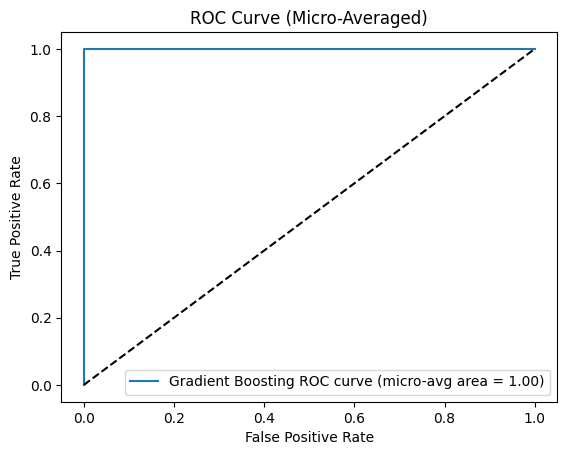

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting classifier
gb_model = GradientBoostingClassifier()

# Fit the model
gb_model.fit(X_train, y_train)

# Predictions
y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)

# Evaluate performance
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

# Confusion Matrix
confusion_mtx = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", confusion_mtx)

# ROC Curve (for multiclass, consider micro- or macro-averaging)
y_prob = gb_model.predict_proba(X_test)[:, 1]  # Select probabilities for the positive class
# Micro-averaged ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)  # Assuming 1 is a positive class
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting ROC curve (micro-avg area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Micro-Averaged)')
plt.legend(loc="lower right")
plt.show()

# Store metrics (consider micro/macro averaging for multiclass)
table["GradientBoosting"] = (accuracy_score(y_test, y_pred_test),
                            precision_score(y_test, y_pred_test, average='micro'),
                            recall_score(y_test, y_pred_test, average='micro'),
                            f1_score(y_test, y_pred_test, average='micro'))

Ada Boost

Training Accuracy: 1.0
Testing Accuracy: 1.0
Confusion Matrix:
 [[30793     0]
 [    0  1636]]


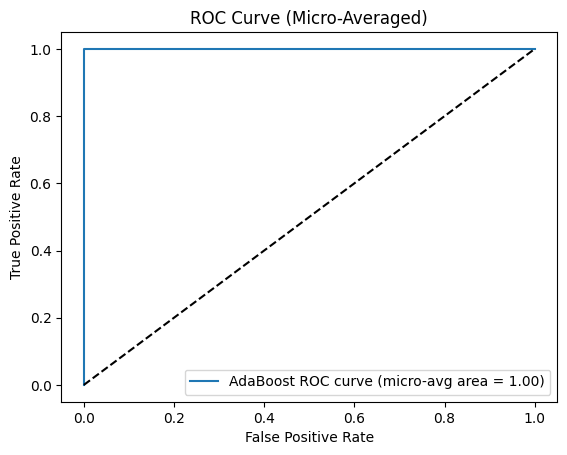

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost classifier
ab_model = AdaBoostClassifier()

# Fit the model
ab_model.fit(X_train, y_train)

# Predictions
y_pred_train = ab_model.predict(X_train)
y_pred_test = ab_model.predict(X_test)

# Evaluate performance
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

# Confusion Matrix
confusion_mtx = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", confusion_mtx)

# ROC Curve (for multiclass, consider micro- or macro-averaging)
y_prob = ab_model.predict_proba(X_test)[:, 1]  # Select probabilities for the positive class
# Micro-averaged ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)  # Assuming 1 is a positive class
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='AdaBoost ROC curve (micro-avg area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Micro-Averaged)')
plt.legend(loc="lower right")
plt.show()

# Store metrics (consider micro/macro averaging for multiclass)
table["AdaBoost"] = (accuracy_score(y_test, y_pred_test),
                            precision_score(y_test, y_pred_test, average='micro'),
                            recall_score(y_test, y_pred_test, average='micro'),
                            f1_score(y_test, y_pred_test, average='micro'))

Results

In [ ]:
# Create DataFrame to Compare Metrics
results_df = pd.DataFrame(table, index=["accuracy", "precision", "recall", "f1score"])
results_df

,NaiveBayes,SVM,DecisionTree,GradientBoosting,AdaBoost
accuracy,0.960159,0.998582,1.0,1.0,1.0
precision,0.960159,0.998582,1.0,1.0,1.0
recall,0.960159,0.998582,1.0,1.0,1.0
f1score,0.960159,0.998582,1.0,1.0,1.0


As the traing and testing accuiracy are high. It is free from overfitting

Among all the models, the basic model is Decision giving the best value of 100 % in accuracy.

---
So train decision tree with the mobile integration and give the alert


**Pilot Testing:**
Objective: Test the system with sample data.
We'll use two different scenarios for testing.

**Feedback Integration:**
Objective: Collect and act on feedback.
Simulate user feedback suggesting changes in the alert threshold.

Loading the Model and Integrating Alerts

In [ ]:
def get_safety_tips():
    tips = [
        "Stay hydrated by drinking plenty of water.",
        "Avoid strenuous activities during the hottest parts of the day.",
        "Wear lightweight and light-colored clothing.",
        "Check on elderly neighbors and family members.",
        "Use fans or air conditioning to keep cool."
    ]
    return "\n".join(tips)


In [ ]:

import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Save the model
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dt, f)
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder

# Load the trained model
with open('decision_tree_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Initialize LabelEncoder outside the function for consistency
label_encoder = LabelEncoder()

def classify_health_condition(row):
    if row['Temperature (C)'] > 35 or row['Short-wave irradiation (Wh/m2)'] > 800:
        return 1  # High risk
    else:
        return 0  # Normal

def generate_alert(user_data):
    """
    Generate alerts based on user data and model predictions.
    """
    # Convert user_data to a DataFrame
    user_df = pd.DataFrame([user_data])

    # Calculate health condition and add it as a feature
    user_df['Health Condition'] = user_df.apply(classify_health_condition, axis=1)

    # Encode 'Health Condition' to numerical values
    user_df['Health Condition'] = label_encoder.fit_transform(user_df['Health Condition'])

    # Check if user_df has the expected number of features
    if user_df.shape[1] != model.n_features_in_:
        return f"Error: Expected {model.n_features_in_} features, but got {user_df.shape[1]}."

    # Predict using the model
    prediction = model.predict(user_df)

    if prediction[0] == 1:
        return "Alert: High risk of heatwave. Please take precautions. Stay away from temperatures above 35°C or irradiation levels above 800 Wh/m²."
    else:
        return "No immediate risk of heatwave. Stay safe and hydrated."

# Example user data
user_data1 = {
    'Temperature (C)': 33,
    'Relative humidity': 60,
    'Pressure': 1010,
    'Wind speed': 5,
    'Wind direction': 90,
    'Rainfall': 0,
    'Short-wave irradiation (Wh/m2)': 900,
}

# Generate alert
alert_message = generate_alert(user_data1)
print(alert_message)


Alert: High risk of heatwave. Please take precautions. Stay away from temperatures above 35°C or irradiation levels above 800 Wh/m².


Test case 1 prediction: [1]
Test case 2 prediction: [1]


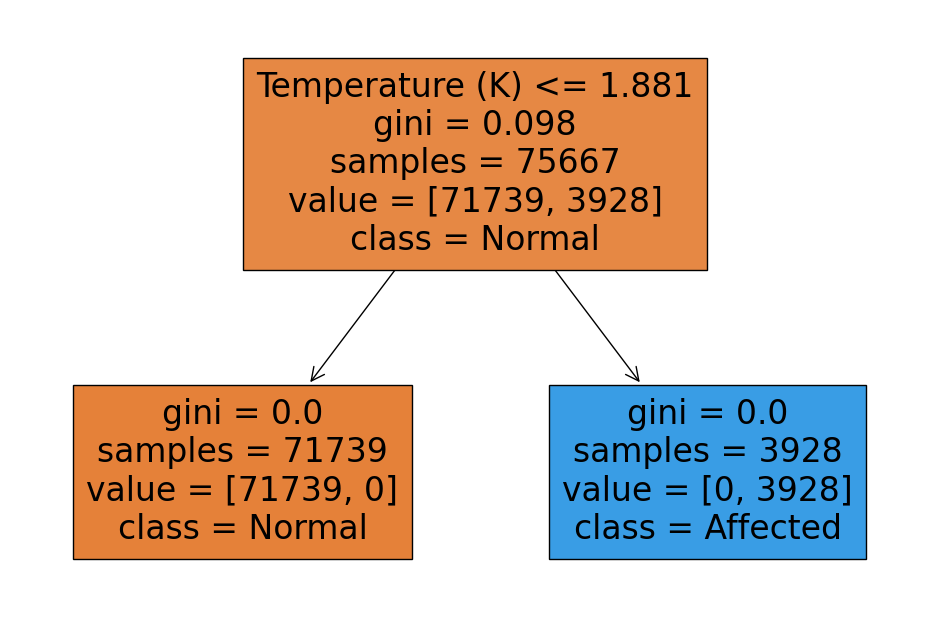

Test Case 1:
[1]
Alert: High risk of heatwave. Please take precautions. Stay hydrated by drinking plenty of water.
Avoid strenuous activities during the hottest parts of the day.
Wear lightweight and light-colored clothing.
Check on elderly neighbors and family members.
Use fans or air conditioning to keep cool.

Test Case 2:
[1]
Alert: High risk of heatwave. Please take precautions. Stay hydrated by drinking plenty of water.
Avoid strenuous activities during the hottest parts of the day.
Wear lightweight and light-colored clothing.
Check on elderly neighbors and family members.
Use fans or air conditioning to keep cool.



In [ ]:
import pickle

# Assuming 'decision_tree_model.pkl' is already created and saved
with open('decision_tree_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Function to generate alerts
def generate_alert(user_data, custom_temp_threshold=32, custom_irradiation_threshold=800):
    user_df = pd.DataFrame([user_data])

    # Consider multiple factors for 'Health Condition'
    user_df['Health Condition'] = user_df.apply(lambda row: 1 if (row['Temperature (C)'] >= custom_temp_threshold and row['Short-wave irradiation (Wh/m2)'] >= custom_irradiation_threshold) else 0, axis=1)

    user_df['Health Condition'] = label_encoder.fit_transform(user_df['Health Condition'])
    prediction = model.predict(user_df)
    print (prediction)

    if prediction == 1:
        alert_message = "Alert: High risk of heatwave. Please take precautions."
        tips= get_safety_tips()
    else:
        alert_message = "Alert: High risk of heatwave. Please take precautions."
        tips = "Take immediate precautions. Stay indoors, drink plenty of water, and avoid physical exertion."


    full_message = f"{alert_message} {tips}"
    return full_message

# Updated classify_health_condition function (Ensure this aligns with your model's training data)
def classify_health_condition(row):
    if row['Temperature (C)'] > 35 or row['Short-wave irradiation (Wh/m2)'] > 800:
        return 1 # High risk
    else:
        return 0  # Normal

# Pilot Testing - Simulate real-world conditions
def pilot_testing():
  # Test cases
  test_case_1 = {
      'Temperature (C)': 38,
      'Relative humidity': 50,
      'Pressure': 1011,
      'Wind speed': 2,
      'Wind direction': 100,
      'Rainfall': 0,
      'Short-wave irradiation (Wh/m2)': 1200,
  }

  test_case_2 = {
      'Temperature (C)': 30,
      'Relative humidity': 70,
      'Pressure': 1000,
      'Wind speed': 8,
      'Wind direction': 200,
      'Rainfall': 1,
      'Short-wave irradiation (Wh/m2)': 900,
  }
  test_cases = [test_case_1,test_case_2]
  # Convert test cases to DataFrames
  test_df1 = pd.DataFrame([test_case_1])
  test_df2 = pd.DataFrame([test_case_2])

  # Calculate health condition and add it as a feature
  test_df1['Health Condition'] = test_df1.apply(classify_health_condition, axis=1)
  test_df2['Health Condition'] = test_df2.apply(classify_health_condition, axis=1)
 # Make predictions
  prediction1 = dt.predict(test_df1)
  prediction2 = dt.predict(test_df2)


  print(f"Test case 1 prediction: {prediction1}")
  print(f"Test case 2 prediction: {prediction2}")

  plt.figure(figsize=(12, 8))
  plot_tree(dt, feature_names=X.columns, class_names=['Normal', 'Affected'], filled=True)
  plt.show()
  for i, user_data in enumerate(test_cases):
            print(f"Test Case {i+1}:")
            alert_message = generate_alert(user_data)
            print(alert_message)
            print()
pilot_testing()


In [ ]:

import pickle
from sklearn.metrics import accuracy_score, classification_report

# Save the trained model
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dt, f)

# Model Evaluation
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30793
           1       1.00      1.00      1.00      1636

    accuracy                           1.00     32429
   macro avg       1.00      1.00      1.00     32429
weighted avg       1.00      1.00      1.00     32429



costumized

In [ ]:
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder

# Load the trained decision tree model
with open('decision_tree_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Sample educational content and tips
educational_content = {
    'low_risk': "Stay hydrated and avoid prolonged exposure to the sun.",
    'high_risk': "Take immediate precautions. Stay indoors, drink plenty of water, and avoid physical exertion."
}

# Function to generate alerts
def generate_alert(user_data, custom_temp_threshold=32, custom_irradiation_threshold=800):
    # Convert user_data to a DataFrame
    user_df = pd.DataFrame([user_data])

    # Adjust health condition based on custom thresholds
    user_df['Health Condition'] = user_df.apply(lambda row: 1 if row['Temperature (C)'] >= custom_temp_threshold or row['Short-wave irradiation (Wh/m2)'] >= custom_irradiation_threshold else 0, axis=1)

    # Encode 'Health Condition' to numerical values
    user_df['Health Condition'] = label_encoder.fit_transform(user_df['Health Condition'])

    # Predict using the decision tree model
    prediction = model.predict(user_df)

    if prediction[0] == 1:
        alert_message = "Alert: High risk of heatwave. Please take precautions."
        tips = educational_content['high_risk']
    else:
        alert_message = "No immediate risk of heatwave. Stay safe and hydrated."
        tips = educational_content['low_risk']

    # Combine alert message with educational content
    full_message = f"{alert_message} {tips}"
    return full_message

# Example usage - with custom thresholds set by users
user_data1 = {
    'Temperature (C)': 33,
    'Relative humidity': 60,
    'Pressure': 1010,
    'Wind speed': 5,
    'Wind direction': 90,
    'Rainfall': 0,
    'Short-wave irradiation (Wh/m2)': 850,
}

custom_temp_threshold = 30
custom_irradiation_threshold = 750

alert_message = generate_alert(user_data1, custom_temp_threshold, custom_irradiation_threshold)
print(alert_message)


Alert: High risk of heatwave. Please take precautions. Take immediate precautions. Stay indoors, drink plenty of water, and avoid physical exertion.


Key Benefits of Logging

Improved Debugging: Makes finding and fixing errors much easier.

Enhanced Monitoring: Provides insights into how your application is running.

Better Security: Helps detect and respond to security threats.

Simplified Maintenance: Makes it easier to understand and maintain your code over time.

In [ ]:
import logging

# Configure logging
logging.basicConfig(filename='pilot_testing.log', level=logging.INFO)

def log_pilot_data(user_data, alert_message, actual_event):
    """
    Log pilot testing data for evaluation and print to console.
    """
    logging.info(f"User Data: {user_data}")
    logging.info(f"Alert Message: {alert_message}")
    logging.info(f"Actual Heatwave Event: {actual_event}")

    # Print messages to the console as well
    print(f"User Data: {user_data}")
    print(f"Alert Message: {alert_message}")
    print(f"Actual Heatwave Event: {actual_event}")

# Example usage
user_data = {
    'Temperature (C)': 38,
    'Relative humidity': 65,
    'Pressure': 1015,
    'Wind speed': 4,
    'Wind direction': 120,
    'Rainfall': 0,
    'Short-wave irradiation (Wh/m2)': 600,

}

# Calling health function after defining user_data completely
user_data['Health Condition'] = health(user_data)
alert_message = generate_alert(user_data)
actual_event = True  # Example: True if a heatwave event occurred
print (user_data)
log_pilot_data(user_data, alert_message, actual_event)

{'Temperature (C)': 38, 'Relative humidity': 65, 'Pressure': 1015, 'Wind speed': 4, 'Wind direction': 120, 'Rainfall': 0, 'Short-wave irradiation (Wh/m2)': 600, 'Health Condition': 1}
User Data: {'Temperature (C)': 38, 'Relative humidity': 65, 'Pressure': 1015, 'Wind speed': 4, 'Wind direction': 120, 'Rainfall': 0, 'Short-wave irradiation (Wh/m2)': 600, 'Health Condition': 1}
Alert Message: Alert: High risk of heatwave. Please take precautions. Take immediate precautions. Stay indoors, drink plenty of water, and avoid physical exertion.
Actual Heatwave Event: True
